In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
import matplotlib as mpl
label_size=16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size

In [2]:
dat = np.loadtxt("W02_spec.txt")
eA = dat[:,0]
jA = dat[:,1]

In [3]:
Nene = 40
eArr = np.logspace(2, 10, Nene)
jp_interp = si.interp1d(np.log10(eA), np.log10(jA), bounds_error=False,fill_value="extrapolate")

In [4]:
jNew = 10**jp_interp(np.log10(eArr))

Text(0,0.5,u'Flux')

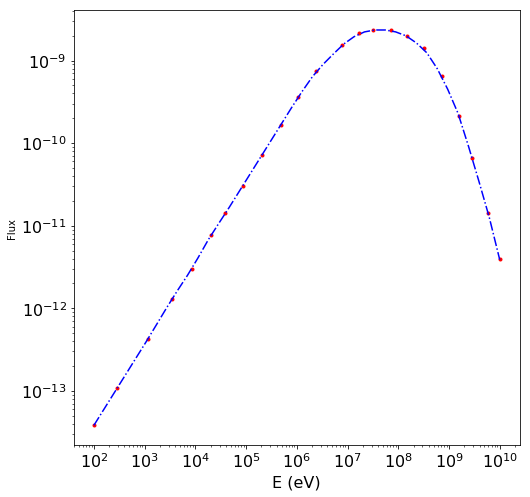

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.loglog(eA, jA, 'r.', label="Original")
ax.loglog(eArr, jNew, 'b-.', label='Formatted')
ax.set_xlabel("E (eV)", fontsize=16)
ax.set_ylabel("Flux")

In [7]:
f = open("W02_spec.dat", 'w')
for (e, j) in zip(eArr, jNew):
    f.write("%e\t%e\n"%(e,j))
f.close()